# Stop Using SMOTE to Treat Class Imbalance

## Take this intuitive approach instead

출처: [https://towardsdatascience.com/stop-using-smote-to-treat-class-imbalance-take-this-intuitive-approach-instead-9cb822b8dc45](https://towardsdatascience.com/stop-using-smote-to-treat-class-imbalance-take-this-intuitive-approach-instead-9cb822b8dc45)

Classification 문제에서 binary 또는 multi-class이든 각 클래스에 속하는 관측값의 수가 불균형한 경우가 있습니다. class imbalance의 일반적인 예는 사기 vs 비 사기 거래입니다. 전체 데이터 세트의 임의 샘플은 비 사기 거래에 대해 훨씬 더 많은 관찰을 할 것입니다.

The imbalance in the data는 대부분의 machine learning 알고리즘이 각 클래스의 관찰 횟수가 거의 같다는 가정으로 생성되었기 때문에 문제가 됩니다.

Class imbalance를 해결하는 방법에는 여러 가지가 있으며 undersampling과 SMOTE가 가장 많이 사용됩니다. 그러나 이 두 가지 방법 모두 높은 수준의 recall에 도달하지 못하고 파이프라인에 과도한 복잡성을 가중시킵니다.

이 아티클에서는 undersampling과 SMOTE보다 불균형 데이터에서 더 나은 성능을 제공하는 직관적인 방법을 보여줍니다. 또한, 이는 복잡성이 낮고, 이미 scikit-learn 분류 모델에 내장되어 있습니다.

# SMOTE Refresher
SMOTE는 2002년에 소개된 "Synthetic Minority Oversampling Technique"의 약자입니다. 이름에서 알 수 있듯 합성 데이터 포인트를 생성하여 소수 class의 수를 늘리는 방식으로 데이터 균형을 맞춥니다.

SMOTE는 k-nearest neighbours 접근 방식을 사용하여 첫 번째 단계로 feature 공간에서 서로 가까운 데이터 포인트를 식별합니다. 그런 다음 데이터 포인트 사이에 선을 투영하고 해당 선을 따라 가짜 데이터를 생성합니다. 이것이 데이터에 어떤 영향을 미치는지 봅시다.

## This is what they tell you SMOTE does:

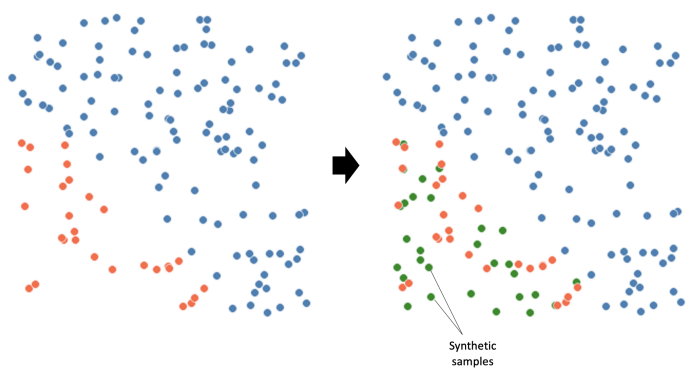

## This is what SMOTE actually does:

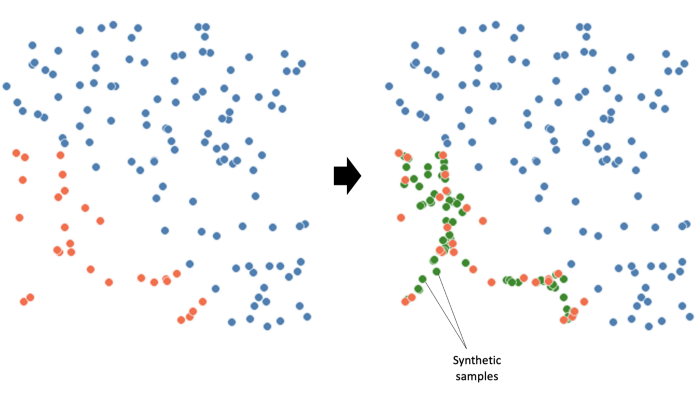

보시다시피 SMOTE는 빨간 점이 차지하는 영역을 채우지 않습니다. 그것은 이제 우리의 모델이 배워야 하는 소수 class에 특이한 패턴을 생성했을 뿐입니다.

# Undersampling Refresher
Undersampling의 기본 개념은 간단합니다. 각 클래스의 수가 같아질 때까지 다수 class의 관측값을 제거하는 것입니다.

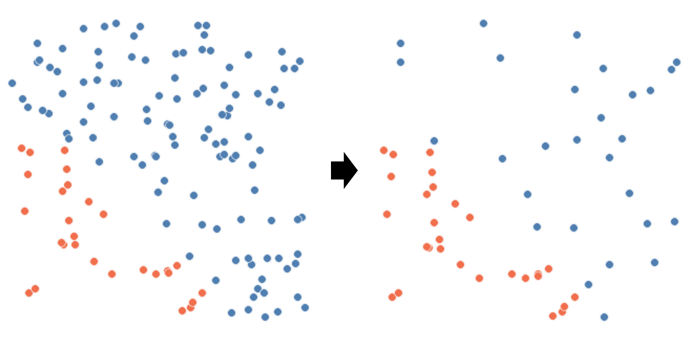

# Class Weights
scikit-learn 및 neural networks의 모든 classification 모델에는 class weights라는 하이퍼파라미터가 있습니다. 이 하이퍼파라미터는 precision와 recall 사이의 trade-ff를 제어하기 위해 설계되었으며, 다른 말로 하면 class imbalance를 처리하는 것과 같습니다.

이 아이디어는 각 클래스에 weights를 할당하여 모든 클래스에 대해 관측값의 weighted sum이 동일하도록 하는 것입니다. n이 관측값의 수이고, w가 weight인 두 클래스의 경우:

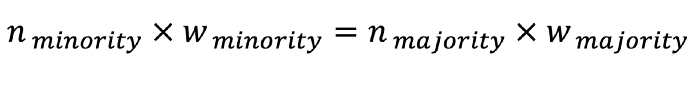

당연히 소수 class에 대한 weight이 다수 class에 대한 weight보다 높을 것입니다. 학습할 때, machine learning 모델은 weight이 높은 observation에 더 많은 주의를 기울입니다.

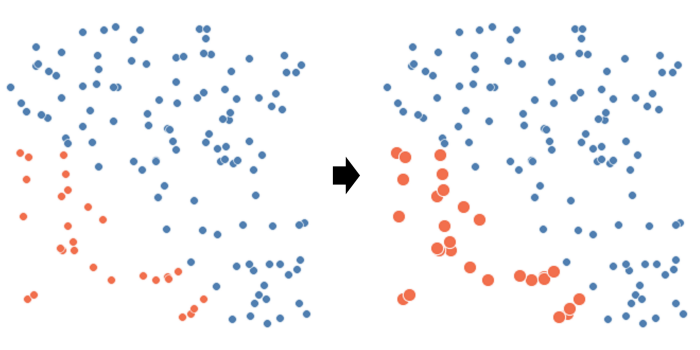

# Which method is better?
3가지 모두 작동하는 모습을 살펴보겠습니다. case study를 위해, 이직을 원하는 개인의 Kaggle 데이터 세트를 살펴봅니다. 우리는 이 데이터를 활용하고, targeted 채용이란 새로운 기회에 열려 있는 사람들을 식별하는 것을 목표로 합니다. 다음은 데이터 및 라이선스 정보입니다:

[https://www.kaggle.com/datasets/kukuroo3/hr-data-predict-change-jobscompetition-form](https://www.kaggle.com/datasets/kukuroo3/hr-data-predict-change-jobscompetition-form)

데이터 pre-processing 및 feature engineering 단계는 이 아티클의 범위에 포함되지 않으므로 plot을 살펴보겠습니다:

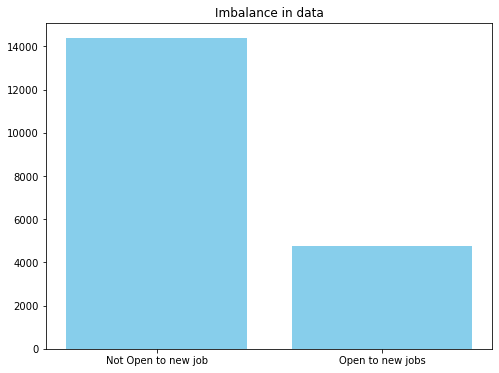

여기서는 4가지 다른 전략을 사용하여 비교합니다. 첫째, class imbalance에 신경 쓰지 않는 것처럼 random forest 모델을 훈련합니다.

두 번째로, SMOTE를 사용하여 다음을 oversampling합니다:

In [ ]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=7)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

그 다음은 undersampling입니다.

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

마지막으로는 class weights:

In [ ]:
count_class_1 = y_train.value_counts()[0]
count_class_2 = y_train.value_counts()[1]
ratio = count_class_1 / count_class_2
rf_estimator = RandomForestClassifier(class_weight={1: ratio, 0: 1})

아래는 strategy에 따른 recall 값입니다:

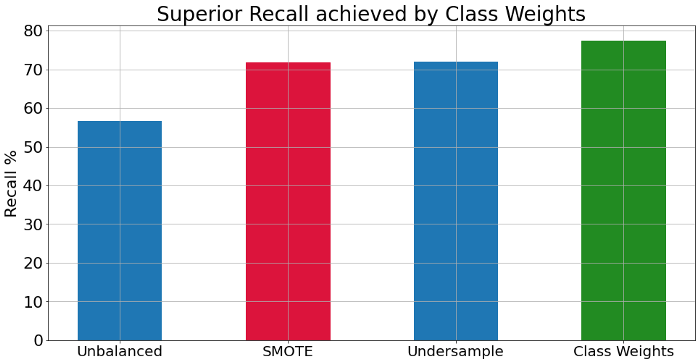

보다시피, class weights를 조정하면 최상의 recall을 얻을 수 있습니다. 그러나 단순하게 precision을 희생함으로써 높은 recall을 달성할 수 있다는 것을 알고 있습니다. 따라서, precision와 F1 score도 표시해 보겠습니다.

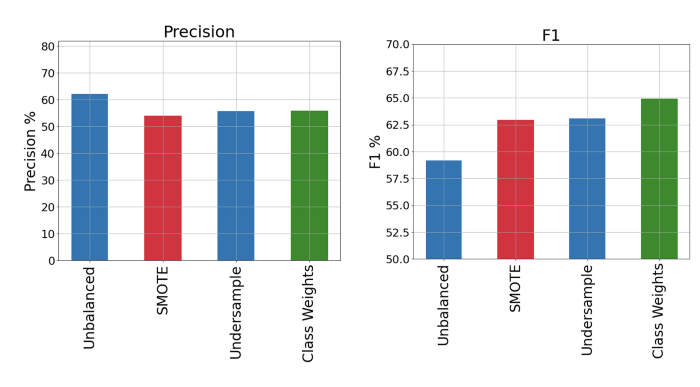

class weights는 class imbalance와 관련하여 다른 접근 방식보다 더 나은 성능을 보입니다.

# What if the imbalance was worse?
다양한 imbalance 수준에서 이러한 각 전략의 성능을 테스트하기 위해 ```for``` 루프에서 소수 class의 일부 데이터 포인트를 무작위로 제거하고 모델링 프로세스를 반복해 각 접근 방식의 성능을 기록하는 함수를 작성했습니다.

In [ ]:
for i in range(11):
    to_drop = df[df['target']==1].sample(400).index.values
    df = df.drop(to_drop)
    X = df.drop(["target"], axis=1)
    y = df["target"]
    train_all_strategies(X, y, 'smote', 'undersampling', 'class_weights')

각 접근 방식이 가능한 최상의 결과를 반환하도록 하는 hyperparameter tuning 단계도 있습니다. 아래에서는 각 iteration에서 recall 점수를 표시합니다.

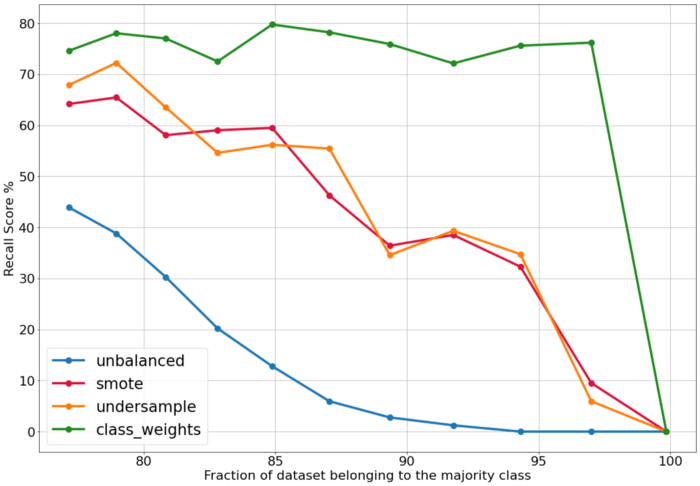

이 그래프에서 알 수 있는 시사점은:

1. 업데이트된 class weights를 사용하여 class imbalance을 처리할 때 모델의 성능이 일관되게 높습니다.

2. SMOTE 및 undersampling 모델의 성능은 점차 떨어집니다.

3. 전체 데이터 세트가 하나의 클래스로 구성될 때 모든 strategy에 대해 recall이 0으로 떨어집니다.

# Summary
이 아티클에서는 분류를 위한 class imbalance을 처리하기 위한 SMOTE, random undersampling 및 class weights에 대해 논의했습니다. case study에서, class weights를 잘 선택하는 것이 최고의 모델링 성능을 가져올 수 있다는 것을 보여주었습니다. 또한, 이 방법이 다양한 수준의 class imbalance에서의 우수성을 유지한다는 것을 보여주었습니다.

이 방법의 또 다른 장점은 단순성입니다. SMOTE는 실행하는 데 상당한 시간이 걸리지만, class weights는 machine learning pipeline의 시간 복잡성을 추가하지 않습니다.